# Linear Discriminant Analysis (LDA)

**Objective**:
 demonstrate how LDA works.

**Assumptions**
- all features are normal distributed

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

### Cenario 1 - LDA with 1 normal distribuited feature and 1 class 

             x  y
258  15.555925  1
612  12.363528  1
244  14.835385  1
57    6.005414  0
17    8.664645  0


<AxesSubplot:xlabel='x', ylabel='Count'>

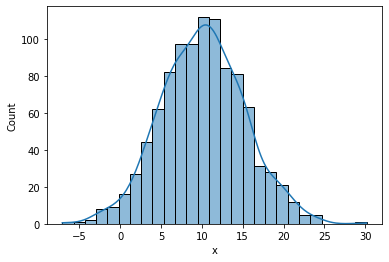

In [4]:
#feature
mean, std = 10, 5
x = np.random.normal(mean, std, 1000)

#class
#fx = b0 + b1 * x1 + error
error = np.random.normal(0, 1, 1000)
fx = x + error

y = [1 if i >= mean else 0 for i in x]

#data with X an y
data = pd.DataFrame({'x':x, 'y':y})
print(data.sample(5))

sns.histplot(data=data, x='x', kde=True)

In [5]:
#LDA
#step 1: separate the sample by class
sample_class1 = data.loc[data['y'] == 1, 'x']
sample_class0 = data.loc[data['y'] == 0, 'x']


#step 2: calculate the means and probability of a random element belong to each class
mean_class1 = sample_class1.mean()
print(mean_class1)

mean_class0 = sample_class0.mean()
print(mean_class0)

prob_class1 = len(sample_class1)/len(data)
print(prob_class1)

prob_class0 = 1 - prob_class1
print(prob_class0)


#step 3: calculate std as a weighted average of sample variance for each class
sample_lda = 1/(len(data) - len(set(y))) * (sum((sample_class1 - mean_class1) ** 2) + sum((sample_class0 - mean_class0) ** 2))
print(sample_lda)


#step 4: LDA classifier
pred_class1 = data['x'] * mean_class1/(sample_lda**2) - (mean_class1**2)/(2*(sample_lda**2)) + np.log(prob_class1)
pred_class0 = data['x'] * mean_class0/(sample_lda**2) - (mean_class0**2)/(2*(sample_lda**2)) + np.log(prob_class0)

14.08072295122703
6.021956454410554
0.512
0.488
9.57165737516744


In [6]:
#comparing results
data['prob_class1'] = pred_class1
data['prob_class0'] = pred_class0
data['prediction_lda'] = np.where(data['prob_class1'] > data['prob_class0'], 1, 0)

print(confusion_matrix(data['y'], data['prediction_lda']))
print(accuracy_score(data['y'], data['prediction_lda']))
print(precision_score(data['y'], data['prediction_lda']))
print(recall_score(data['y'], data['prediction_lda']))

[[449  39]
 [  0 512]]
0.961
0.9292196007259528
1.0


<AxesSubplot:xlabel='x', ylabel='prob_class1'>

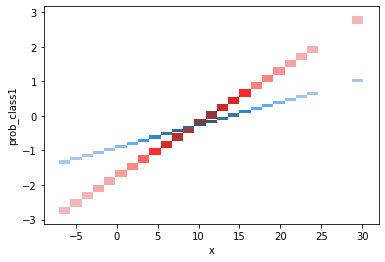

In [7]:
#graphing the probabilty
sns.histplot(data=data, x='x', y='prob_class1', kde=True, color='red')
sns.histplot(data=data, x='x', y='prob_class0', kde=True)

**Conclusion**: the predictions of LDA displayed accuracy higher than 90% in most of the executions. As we can see in the graph, each line is the probability calculated by the algorithm for every element to belong to each class, and so the prediction is based on wich line is higher. 